In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

Bottlenecks - constant/irregular 
*ignoring bus stop sections
Finding downtown vs suburbs bottlenecks
1st Quartile of each route for constant
*Delayed data

Focus on Inbound/Outbound

Time categories -
## 6am - 9am AM Peak
9am-230pm Off Peak
230pm-6pm PM Peak
6pm-6am Overnight
Day of Interest
Saturday
Sunday
Holidays*
## M/F
## Tues-Thurs
## 5/25-7/26
## 1/25-5/24


In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

## data from 5/25/2022 - 7/24/2022 , AM peak, M/F

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

params_geo = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params_geo1 = {
    'direction': '1',
    'startDate': '06-25-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params1 = {
       'direction': '1',
    'startDate': '06-25-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [5]:
response_geo = requests.get(URL, params = params_geo, headers = headers)
response_geo1 = requests.get(URL, params = params_geo1, headers = headers)
response = requests.get(URL, params = params, headers = headers)
response1 = requests.get(URL, params = params1, headers = headers)

In [6]:
response_line_seg = response_geo.json()['features']
response_line_seg1 = response_geo1.json()['features']
response_line_seg2 = response.json()['data']['segments']
response_line_seg3 = response.json()['data']['segments']
r3_525 = gpd.GeoDataFrame.from_features(response_line_seg)
r3_625 = gpd.GeoDataFrame.from_features(response_line_seg1)
r3_525j = pd.DataFrame.from_dict(response_line_seg2)
r3_625j = pd.DataFrame.from_dict(response_line_seg3)

In [7]:
r3_525

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.617277,15.028347,2.809,1.941,1.799,1.709,1.5810,1.474,1.355,1.144
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.369030,10.242589,8.009,3.766,2.783,2.401,2.0800,1.841,1.640,1.256
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.424825,17.044198,1.875,1.614,1.582,1.491,1.4320,1.322,1.224,1.083
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.221471,11.187632,7.207,3.511,2.813,2.245,1.8385,1.659,1.408,1.056
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.064083,2.710920,67.580,42.925,5.901,3.671,2.4060,1.757,1.398,0.932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.571910,15.741359,13.784,1.730,1.453,1.377,1.2820,1.193,1.041,0.823
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.701338,14.080682,5.787,2.231,1.888,1.732,1.5760,1.417,1.232,1.020
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.626380,14.695828,3.539,2.124,1.782,1.694,1.5540,1.418,1.248,0.829
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.241292,7.605301,22.776,5.763,4.631,3.921,2.2850,1.720,0.783,0.388


In [8]:
r3_525j1 = r3_525j[['percent20Secs', 'countForSegment']]

In [9]:
res525 = pd.concat([r3_525, r3_525j1], axis = 1)
res525

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.617277,15.028347,2.809,1.941,1.799,1.709,1.5810,1.474,1.355,1.144,1.386,65
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.369030,10.242589,8.009,3.766,2.783,2.401,2.0800,1.841,1.640,1.256,1.732,134
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.424825,17.044198,1.875,1.614,1.582,1.491,1.4320,1.322,1.224,1.083,1.274,63
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.221471,11.187632,7.207,3.511,2.813,2.245,1.8385,1.659,1.408,1.056,1.567,70
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.064083,2.710920,67.580,42.925,5.901,3.671,2.4060,1.757,1.398,0.932,1.649,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.571910,15.741359,13.784,1.730,1.453,1.377,1.2820,1.193,1.041,0.823,1.135,67
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.701338,14.080682,5.787,2.231,1.888,1.732,1.5760,1.417,1.232,1.020,1.331,133
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.626380,14.695828,3.539,2.124,1.782,1.694,1.5540,1.418,1.248,0.829,1.348,137
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.241292,7.605301,22.776,5.763,4.631,3.921,2.2850,1.720,0.783,0.388,1.388,48


In [11]:
res625 =pd.concat([r3_625, r3_625j[['percent20Secs', 'countForSegment']]], axis = 1)
res625
                  

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.542224,15.759708,2.553,1.951,1.720,1.591,1.5085,1.408,1.250,0.777,1.386,65
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.442629,9.933969,17.390,3.443,2.860,2.527,2.1415,1.845,1.575,1.318,1.732,134
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.415175,17.160422,2.318,1.575,1.526,1.480,1.3930,1.335,1.225,1.147,1.274,63
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.092410,11.877691,5.214,3.887,2.339,2.044,1.7300,1.550,1.339,1.111,1.567,70
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,7.731145,3.178313,76.658,32.924,6.629,3.302,2.1400,1.665,1.446,0.889,1.649,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.566331,15.294341,4.223,1.859,1.712,1.613,1.4765,1.391,1.266,0.965,1.135,67
1048,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.573220,15.192408,3.695,2.003,1.797,1.605,1.4805,1.357,1.199,0.962,1.331,133
1049,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.613933,9.159760,5.265,4.459,3.519,3.084,2.3000,1.824,1.510,1.259,1.348,137
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.356250,7.344804,19.285,5.681,5.110,3.807,2.6725,1.748,1.230,0.692,1.388,48


## M/F
## 1/25-5/24

In [14]:
params_geo2 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params_geo3 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params_geo4 = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate' : '04-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params_geo5 = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate' : '05-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params2 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params3 = {
       'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params4 = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate' : '04-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

params5 = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate' : '05-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '1,5',
}

In [15]:
response_geo2 = requests.get(URL, params = params_geo2, headers = headers)
response_geo3 = requests.get(URL, params = params_geo3, headers = headers)
response_geo4 = requests.get(URL, params = params_geo4, headers = headers)
response_geo5 = requests.get(URL, params = params_geo5, headers = headers)
response2 = requests.get(URL, params = params2, headers = headers)
response3 = requests.get(URL, params = params3, headers = headers)
response4 = requests.get(URL, params = params4, headers = headers)
response5 = requests.get(URL, params = params5, headers = headers)

In [16]:
response_line_seg2 = response_geo2.json()['features']
response_line_seg3 = response_geo3.json()['features']
response_line_seg4 = response_geo4.json()['features']
response_line_seg5 = response_geo5.json()['features']
response_line_seg2j = response2.json()['data']['segments']
response_line_seg3j = response3.json()['data']['segments']
response_line_seg4j = response4.json()['data']['segments']
response_line_seg5j = response5.json()['data']['segments']
r3_125 = gpd.GeoDataFrame.from_features(response_line_seg2)
r3_225 = gpd.GeoDataFrame.from_features(response_line_seg3)
r3_325 = gpd.GeoDataFrame.from_features(response_line_seg4)
r3_425 = gpd.GeoDataFrame.from_features(response_line_seg5)
r3_125j = pd.DataFrame.from_dict(response_line_seg2j)
r3_225j = pd.DataFrame.from_dict(response_line_seg3j)
r3_325j = pd.DataFrame.from_dict(response_line_seg4j)
r3_425j = pd.DataFrame.from_dict(response_line_seg5j)

In [17]:
res125 =pd.concat([r3_125, r3_125j[['percent20Secs', 'countForSegment']]], axis = 1)
res225 =pd.concat([r3_225, r3_225j[['percent20Secs', 'countForSegment']]], axis = 1)
res325 =pd.concat([r3_325, r3_325j[['percent20Secs', 'countForSegment']]], axis = 1)
res425 =pd.concat([r3_425, r3_425j[['percent20Secs', 'countForSegment']]], axis = 1)

<AxesSubplot:>

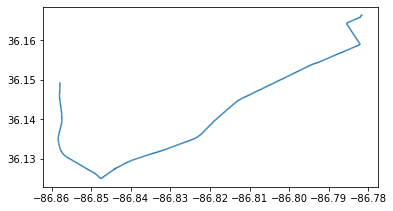

In [22]:
res125.plot()

In [24]:
res225

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.455533,9.881765,6.140,4.147,2.706,2.618,2.2230,2.027,1.523,1.461,1.830,15
1,GEOMETRYCOLLECTION EMPTY,NaN,NaN,NaN,NaN,23.816,1.711979,13.911386,5.045,2.074,1.869,1.727,1.5690,1.464,1.307,0.564,1.400,47
2,"LINESTRING (-86.84323 36.12786, -86.84300 36.1...",HARWOOEN,Harding Pike & Woodlawn Dr Eb,HARVINEN,Harding Pike & Vine Ct Eb,24.851,1.808313,13.742643,2.659,2.435,2.169,2.071,1.6840,1.539,1.391,1.317,1.513,16
3,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.073525,11.813217,5.306,3.506,2.357,2.193,1.8610,1.523,1.318,1.219,1.374,61
4,"LINESTRING (-86.81388 36.14390, -86.81369 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,2.490146,9.757259,4.481,3.689,3.033,2.756,2.4265,2.001,1.746,1.347,1.889,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.140286,11.396608,4.335,2.794,2.480,2.256,2.0180,1.840,1.592,1.237,1.691,63
557,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.746500,8.722374,13.134,9.379,2.977,1.971,1.5435,1.315,1.182,1.111,1.286,16
558,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.661688,14.383567,2.631,2.505,2.146,1.688,1.4840,1.397,1.210,1.071,1.334,16
559,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,7.089508,3.389939,46.448,14.726,10.896,7.403,3.5600,2.672,2.230,1.922,2.477,63


<AxesSubplot:>

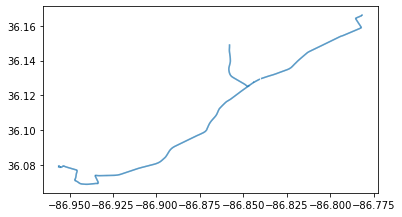

In [25]:
res325.plot()

<AxesSubplot:>

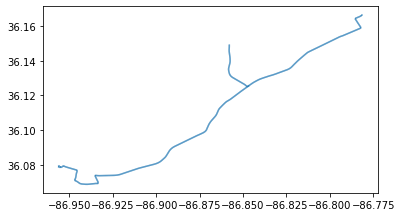

In [26]:
res425.plot()

## Tues/Wed/Thurs for 1/25-7/25

In [27]:
params_geo6 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params_geo7 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params_geo8 = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate' : '04-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params_geo9 = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate' : '05-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params_geo10 = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params_geo11 = {
    'direction': '1',
    'startDate': '06-25-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params6 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params7 = {
       'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params8 = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate' : '04-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params9 = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate' : '05-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params10 = {
    'direction': '1',
    'startDate': '05-25-2022',
    'endDate' : '06-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

params11 = {
    'direction': '1',
    'startDate': '06-25-2022',
    'endDate' : '07-24-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'daysOfWeek' : '2,3,4',
}

In [28]:
response_geo6 = requests.get(URL, params = params_geo6, headers = headers)
response_geo7 = requests.get(URL, params = params_geo7, headers = headers)
response_geo8 = requests.get(URL, params = params_geo8, headers = headers)
response_geo9 = requests.get(URL, params = params_geo9, headers = headers)
response_geo10 = requests.get(URL, params = params_geo10, headers = headers)
response_geo11 = requests.get(URL, params = params_geo11, headers = headers)
response6 = requests.get(URL, params = params6, headers = headers)
response7 = requests.get(URL, params = params7, headers = headers)
response8 = requests.get(URL, params = params8, headers = headers)
response9 = requests.get(URL, params = params9, headers = headers)
response10 = requests.get(URL, params = params10, headers = headers)
response11 = requests.get(URL, params = params11, headers = headers)

In [38]:
response_line_seg6 = response_geo6.json()['features']
response_line_seg7 = response_geo7.json()['features']
response_line_seg8 = response_geo8.json()['features']
response_line_seg9 = response_geo9.json()['features']
response_line_seg10 = response_geo10.json()['features']
response_line_seg11 = response_geo11.json()['features']
response_line_seg6j = response6.json()['data']['segments']
response_line_seg7j = response7.json()['data']['segments']
response_line_seg8j = response8.json()['data']['segments']
response_line_seg9j = response9.json()['data']['segments']
response_line_seg10j = response10.json()['data']['segments']
response_line_seg11j = response11.json()['data']['segments']
r3_125t = gpd.GeoDataFrame.from_features(response_line_seg6)
r3_225t = gpd.GeoDataFrame.from_features(response_line_seg7)
r3_325t = gpd.GeoDataFrame.from_features(response_line_seg8)
r3_425t = gpd.GeoDataFrame.from_features(response_line_seg9)
r3_525t = gpd.GeoDataFrame.from_features(response_line_seg10)
r3_625t = gpd.GeoDataFrame.from_features(response_line_seg11)
r3_125jt = pd.DataFrame.from_dict(response_line_seg6j)
r3_225jt = pd.DataFrame.from_dict(response_line_seg7j)
r3_325jt = pd.DataFrame.from_dict(response_line_seg8j)
r3_425jt = pd.DataFrame.from_dict(response_line_seg9j)
r3_525jt = pd.DataFrame.from_dict(response_line_seg10j)
r3_625jt = pd.DataFrame.from_dict(response_line_seg11j)

In [39]:
res125t =pd.concat([r3_125t, r3_125jt[['percent20Secs', 'countForSegment']]], axis = 1)
res225t =pd.concat([r3_225t, r3_225jt[['percent20Secs', 'countForSegment']]], axis = 1)
res325t =pd.concat([r3_325t, r3_325jt[['percent20Secs', 'countForSegment']]], axis = 1)
res425t =pd.concat([r3_425t, r3_425jt[['percent20Secs', 'countForSegment']]], axis = 1)
res525t =pd.concat([r3_525t, r3_525jt[['percent20Secs', 'countForSegment']]], axis = 1)
res625t =pd.concat([r3_625t, r3_625jt[['percent20Secs', 'countForSegment']]], axis = 1)

<AxesSubplot:>

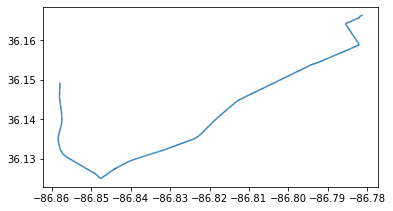

In [50]:
res125t.plot()

In [62]:
res225t

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,3.535125,6.863972,20.360,6.537,3.504,2.892,2.3495,2.005,1.851,1.711,1.935,24
1,GEOMETRYCOLLECTION EMPTY,NaN,NaN,NaN,NaN,23.816,1.637957,14.540064,3.515,2.110,1.779,1.687,1.5715,1.438,1.293,0.903,1.407,70
2,"LINESTRING (-86.84323 36.12786, -86.84300 36.1...",HARWOOEN,Harding Pike & Woodlawn Dr Eb,HARVINEN,Harding Pike & Vine Ct Eb,24.851,2.162375,11.492456,7.599,2.705,2.310,2.092,1.9015,1.683,1.515,1.398,1.561,24
3,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.299957,10.650199,8.269,3.427,2.919,2.492,1.9990,1.766,1.426,1.012,1.612,94
4,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,2.054289,11.495948,6.010,2.894,2.284,2.133,1.7710,1.635,1.480,0.890,1.579,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.567396,9.500677,35.715,2.744,2.444,2.290,2.0905,1.906,1.505,0.720,1.770,96
557,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.439417,9.820379,7.011,6.031,3.399,2.007,1.6640,1.487,1.324,1.167,1.464,24
558,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.703292,14.032239,2.318,2.237,2.016,1.902,1.5965,1.536,1.400,1.165,1.459,24
559,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,6.128537,3.921491,35.559,14.999,9.028,5.306,3.9080,2.859,2.232,1.847,2.465,95


<AxesSubplot:>

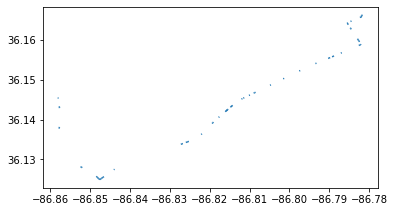

In [51]:
res225t[res225t['averageTravelSeconds'] > 6].plot()

<AxesSubplot:>

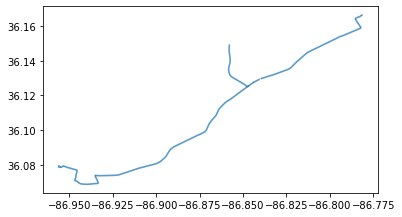

In [42]:
res325t.plot()

<AxesSubplot:>

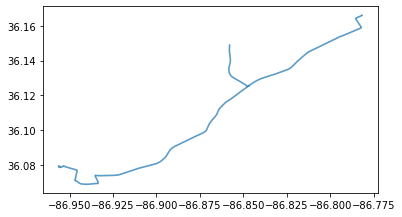

In [43]:
res425t.plot()

<AxesSubplot:>

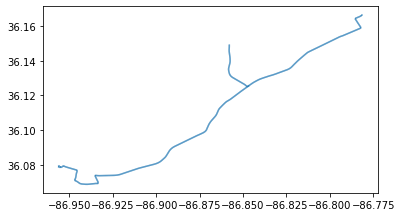

In [44]:
res525t.plot()

<AxesSubplot:>

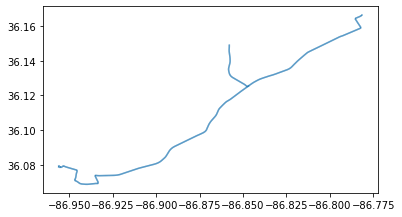

In [45]:
res625t.plot()

In [46]:
res425t

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.859255,13.072440,19.382,2.121,1.935,1.832,1.6380,1.462,1.335,1.077,1.382,98
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.714995,8.937401,18.689,4.295,3.396,2.815,2.2815,2.006,1.708,1.494,1.880,192
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.413825,17.176808,1.875,1.615,1.523,1.484,1.4140,1.325,1.231,0.767,1.284,97
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.702641,9.195820,10.602,4.396,3.645,3.204,2.2510,1.854,1.420,1.077,1.692,92
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,7.521984,3.266691,79.079,10.590,4.750,3.607,2.6250,1.777,1.499,1.208,1.636,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.829286,13.526589,23.502,1.627,1.461,1.370,1.2735,1.213,1.123,1.033,1.185,98
1047,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.898337,12.619466,25.246,2.246,1.799,1.658,1.5260,1.406,1.285,0.997,1.353,187
1048,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.702761,14.036615,6.216,2.262,1.937,1.767,1.5750,1.447,1.297,1.048,1.374,188
1049,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,2.754010,8.693868,5.194,3.855,3.568,3.098,2.5900,2.264,1.851,0.969,2.063,99


In [47]:
res625t

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.624570,14.960882,3.634,1.911,1.757,1.697,1.5890,1.503,1.364,1.106,1.398,86
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.708930,8.957411,9.910,4.302,3.436,3.017,2.3940,1.981,1.686,1.491,1.828,171
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.464765,16.579451,3.532,1.690,1.588,1.516,1.4310,1.350,1.225,1.144,1.281,85
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.242034,11.085024,5.366,4.233,3.052,2.519,1.7795,1.596,1.313,1.033,1.439,88
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,6.390905,3.844839,62.419,18.442,4.337,3.067,2.0770,1.678,1.448,0.734,1.552,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.634260,14.658622,4.523,1.895,1.721,1.645,1.5200,1.409,1.271,1.137,1.339,169
1048,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.614942,14.799912,3.558,2.163,1.768,1.664,1.5040,1.393,1.241,1.065,1.335,171
1049,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.278581,19.352704,1.735,1.494,1.417,1.335,1.2630,1.181,1.107,0.777,1.147,86
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,2.372684,10.389500,6.640,4.957,3.538,2.815,2.0370,1.545,0.767,0.630,1.099,57


In [63]:
res125.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,24.290684,4.128005,9.572785,20.592318,8.099346,5.503342,4.415442,2.866658,2.278507,1.882790,1.605930,2.065599,59.997877
std,1.279032,10.261709,3.828279,36.588138,24.105119,20.562528,18.868968,7.032862,4.297316,3.521756,3.507265,3.700193,8.379940
min,0.000000,1.551571,0.000000,2.057000,1.791000,1.697000,1.603000,1.424000,1.303000,1.225000,0.941000,1.262000,1.000000
25%,24.033000,1.893794,6.898616,4.245000,2.435000,2.029500,1.892500,1.708000,1.562500,1.377000,1.214000,1.472000,62.000000
50%,24.572000,2.432968,10.086928,7.254000,3.339000,2.685000,2.369000,2.069000,1.830000,1.574000,1.303000,1.719000,63.000000
75%,24.853000,3.499971,12.779599,22.473000,5.889000,4.093500,3.309500,2.491500,2.115500,1.799000,1.497000,1.981500,63.000000
max,24.998000,197.282455,15.349604,465.976000,458.107000,417.590000,392.020000,128.521000,75.015000,75.015000,75.015000,75.015000,69.000000


In [64]:
res125t.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,24.289383,6.176690,9.253806,29.115987,11.101275,7.647629,6.372104,4.982785,3.998667,3.092981,2.715195,3.416964,111.891949
std,1.277986,33.457028,3.868691,64.709976,49.511936,38.381034,36.033059,32.927334,30.844284,29.572223,29.583188,29.738273,17.082135
min,0.000000,1.557265,0.000000,2.327000,1.795000,1.660000,1.620000,1.498000,1.396000,1.262000,0.898000,1.350000,1.000000
25%,24.033000,1.974860,6.525338,4.727250,2.490000,2.126000,1.923500,1.730000,1.593750,1.401750,1.167000,1.523250,114.000000
50%,24.533500,2.447077,9.940093,8.684500,3.707500,2.796000,2.429500,2.069000,1.811500,1.521000,1.266000,1.707000,116.000000
75%,24.853000,3.769201,12.362595,32.916250,6.365500,4.395500,3.503000,2.662625,2.194000,1.841250,1.388000,2.035750,120.000000
max,24.998000,644.004000,15.829676,736.271000,644.004000,644.004000,644.004000,644.004000,644.004000,644.004000,644.004000,644.004000,129.000000


In [65]:
res425.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,24.308189,3.143559,11.603596,19.089068,5.694892,3.765135,3.026705,2.260339,1.887840,1.590468,1.250575,1.734079,90.000000
std,0.912262,5.798057,4.983532,36.215485,13.262602,9.280599,7.425293,4.577409,3.538026,3.229957,3.222683,3.262508,34.723647
min,0.000000,1.117566,0.000000,1.385000,1.248000,1.180000,1.159000,1.111000,1.062000,0.941000,0.471000,1.027000,1.000000
25%,24.078000,1.588238,7.993379,2.989000,1.936000,1.759250,1.643750,1.478500,1.348750,1.224500,0.941000,1.290000,69.000000
50%,24.470000,2.093616,11.622393,5.943000,2.825000,2.308000,2.033500,1.757750,1.597000,1.400000,1.122000,1.512000,71.000000
75%,24.723000,3.045708,15.215343,17.991750,4.940500,3.490000,2.852250,2.251000,1.910000,1.610250,1.285000,1.760000,138.000000
max,24.998000,131.291769,21.332836,501.076000,319.419000,244.239000,193.323000,105.001000,105.001000,105.001000,105.001000,105.001000,144.000000


In [66]:
res425t.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,24.308790,3.199849,11.337804,23.098285,5.800043,3.984578,3.119439,2.273070,1.805961,1.519203,1.117002,1.666106,121.410086
std,0.912488,5.405862,4.926743,74.561053,12.984045,9.664907,7.645839,4.532414,1.268874,0.633414,0.589131,0.816851,45.807717
min,0.000000,1.144891,0.000000,1.495000,1.325000,1.229000,1.173000,1.125000,1.066000,0.858000,0.333000,1.045000,2.000000
25%,24.078000,1.619576,7.586970,3.429500,1.989500,1.801000,1.656000,1.491250,1.370000,1.237500,0.863000,1.319000,92.000000
50%,24.470000,2.142302,11.435930,6.569000,2.909000,2.361000,2.142000,1.795000,1.625000,1.418000,1.077000,1.535000,98.000000
75%,24.723000,3.207292,14.994348,22.271500,5.217000,3.753500,3.043500,2.297250,1.918000,1.648000,1.299000,1.790000,186.000000
max,24.998000,124.667538,21.373214,2126.105000,287.693000,215.897000,166.001000,113.780000,33.880000,15.001000,15.001000,16.137000,194.000000


In [55]:
URL2 = 'https://data.nashville.gov/resource/vfe9-k7vc.json'

params12 = {
    '$limit' : '10000'
}

response12 = requests.get(URL2, params = params12)

response12.json()

[{'stop_id_number': '5120',
  'stop_abbreviation': '7AVUNINN',
  'stopname': '7TH AVE & UNION ST NB',
  'shelter': False,
  'bench': False,
  'route_name': 'AIRPORT - DOWNTOWN HOTELS'},
 {'stop_id_number': '5455',
  'stop_abbreviation': 'CM5_4',
  'stopname': 'Temporary Bay 4',
  'shelter': False,
  'bench': False,
  'route_name': 'HERMAN'},
 {'stop_id_number': '2762',
  'stop_abbreviation': '23ACLASF',
  'stopname': '23RD AVE N & CLARKSVILLE PIKE SB',
  'shelter': False,
  'bench': False,
  'route_number': '22',
  'route_name': 'BORDEAUX'},
 {'stop_id_number': '4079',
  'stop_abbreviation': '21ACHUSN',
  'stopname': '21ST AVE N & CHURCH ST SB',
  'shelter': False,
  'bench': True,
  'route_number': '25',
  'route_name': 'MIDTOWN'},
 {'stop_id_number': '4133',
  'stop_abbreviation': 'GRWHIWN',
  'stopname': 'GREEN LN & WHITES CREEK PIKE WB',
  'shelter': False,
  'bench': False,
  'route_number': '41',
  'route_name': 'GOLDEN VALLEY',
  'geocoded_column': {'latitude': '36.236249', 'lon

In [58]:
bus_stops = pd.DataFrame.from_dict(response12.json())

In [61]:
r3_bus_stops = bus_stops[bus_stops['route_name'] == 'WEST END - WHITE BRIDGE']